In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[19]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['FuseOutsideOperationalSpace']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,FuseOutsideOperationalSpace_vCnt,FuseOutsideOperationalSpace_vFreq,FuseOutsideOperationalSpace_vMax,FuseOutsideOperationalSpace_vMin,FuseOutsideOperationalSpace_vStd,FuseOutsideOperationalSpace_vTrend,FuseOutsideOperationalSpace_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,3,0.297310,0.0,0.0,0.0,0.0,0.0
2,3,0.296778,0.0,0.0,0.0,0.0,0.0
3,4,0.398055,0.0,0.0,0.0,0.0,0.0
4,3,0.298554,0.0,0.0,0.0,0.0,0.0


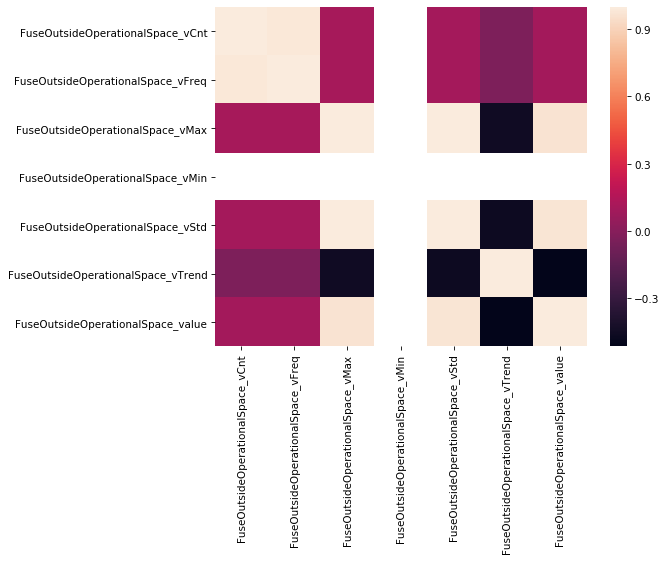

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

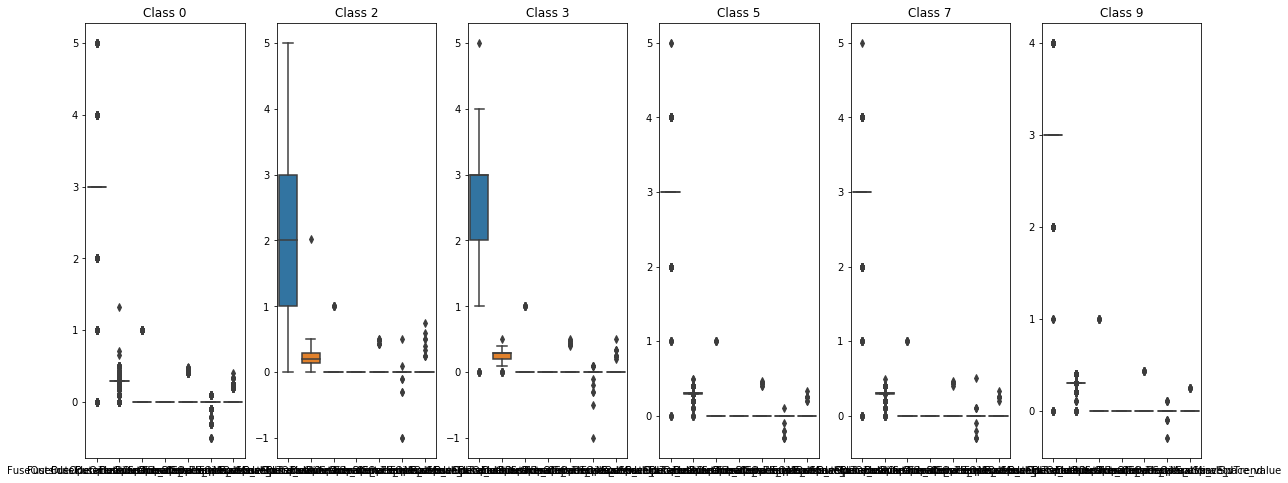

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


d:\Anaconda\envs\KerasTF\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
d:\Anaconda\envs\KerasTF\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
d:\Anaconda\envs\KerasTF\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
d:\Anaconda\envs\KerasTF\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
d:\Anaconda\envs\KerasTF\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
d:\Anaconda\envs\KerasTF\lib\site-p

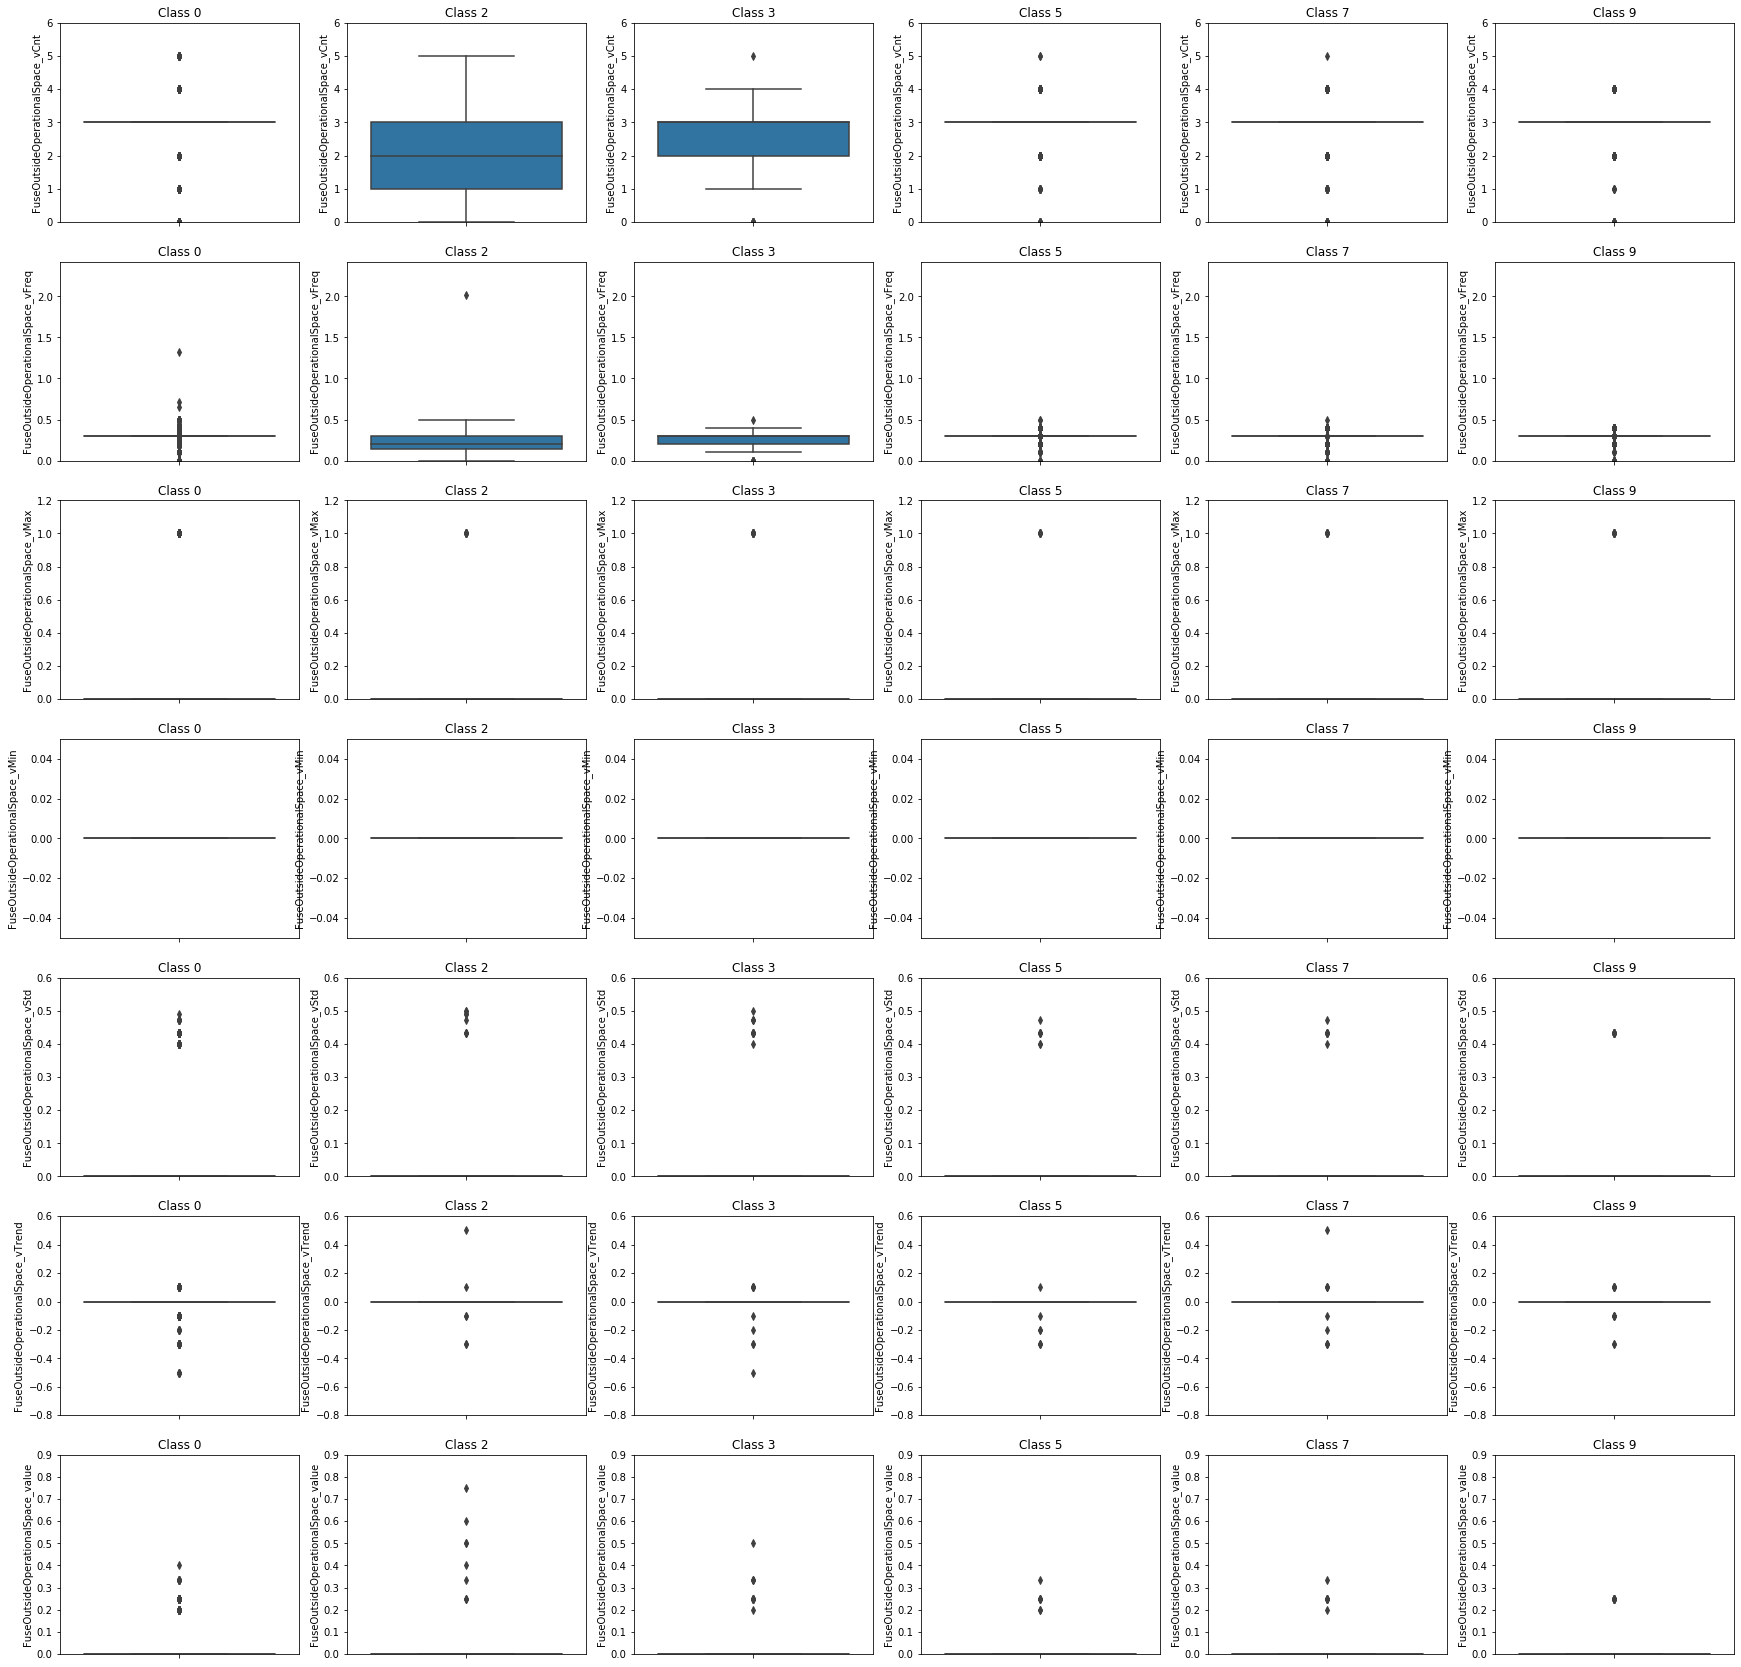

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,FuseOutsideOperationalSpace_vCnt,5.000000,0.0,0.683519,2.983893,3.000000,39611,0
0,99,FuseOutsideOperationalSpace_vFreq,2.019594,0.0,0.068775,0.297049,0.298736,39611,0
0,99,FuseOutsideOperationalSpace_vMax,1.000000,0.0,0.063959,0.004108,0.000000,39196,415
0,99,FuseOutsideOperationalSpace_vMin,0.000000,0.0,0.000000,0.000000,0.000000,39196,415
0,99,FuseOutsideOperationalSpace_vStd,0.500000,0.0,0.027743,0.001779,0.000000,39196,415
0,99,FuseOutsideOperationalSpace_vTrend,0.500000,-1.0,0.015834,-0.000465,0.000000,38459,1152
0,99,FuseOutsideOperationalSpace_value,0.750000,0.0,0.017276,0.001072,0.000000,39196,415


In [14]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 0 FuseOutsideOperationalSpace_vTrend 361 [0, 32, 323, 360]
0 0 FuseOutsideOperationalSpace_vTrend 361 [0, 32, 323, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 17 FuseOutsideOperationalSpace_vTrend 362 [0, 1, 360, 361]
0 17 FuseOutsideOperationalSpace_vTrend 362 [0, 1, 360, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or 

NA at start or end
0 55 FuseOutsideOperationalSpace_vMax 1078 [0, 1, 2, 1077]
0 55 FuseOutsideOperationalSpace_vMax 1078 [0, 1, 2, 1077]
NA at start or end
NA at start or end
0 55 FuseOutsideOperationalSpace_vMin 1078 [0, 1, 2, 1077]
0 55 FuseOutsideOperationalSpace_vMin 1078 [0, 1, 2, 1077]
NA at start or end
NA at start or end
0 55 FuseOutsideOperationalSpace_vStd 1078 [0, 1, 2, 1077]
0 55 FuseOutsideOperationalSpace_vStd 1078 [0, 1, 2, 1077]
NA at start or end
NA at start or end
0 55 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 85, 276, 956, 1077]
0 55 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 85, 276, 956, 1077]
0 55 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 85, 276, 956, 1077]
0 55 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 85, 276, 956, 1077]
0 55 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 85, 276, 956, 1077]
NA at start or end
NA at start or end
0 55 FuseOutsideOperationalSpace_value 1078 [0, 1, 2, 1077]
0 55 FuseOutsideOperationalSpace_value 1

0 74 FuseOutsideOperationalSpace_vMax 360 [358, 359]
NA at start or end
0 74 FuseOutsideOperationalSpace_vMin 360 [358, 359]
NA at start or end
0 74 FuseOutsideOperationalSpace_vStd 360 [358, 359]
NA at start or end
0 74 FuseOutsideOperationalSpace_vTrend 360 [224, 358, 359]
0 74 FuseOutsideOperationalSpace_vTrend 360 [224, 358, 359]
NA at start or end
0 74 FuseOutsideOperationalSpace_value 360 [358, 359]
NA at start or end
0 75 FuseOutsideOperationalSpace_vMax 361 [359, 360]
NA at start or end
0 75 FuseOutsideOperationalSpace_vMin 361 [359, 360]
NA at start or end
0 75 FuseOutsideOperationalSpace_vStd 361 [359, 360]
NA at start or end
0 75 FuseOutsideOperationalSpace_vTrend 361 [99, 150, 359, 360]
0 75 FuseOutsideOperationalSpace_vTrend 361 [99, 150, 359, 360]
0 75 FuseOutsideOperationalSpace_vTrend 361 [99, 150, 359, 360]
NA at start or end
0 75 FuseOutsideOperationalSpace_value 361 [359, 360]
NA at start or end
0 76 FuseOutsideOperationalSpace_vMax 358 [356, 357]
NA at start or end


2 0 FuseOutsideOperationalSpace_vStd 361 [57, 58, 61, 62, 113, 166, 211, 217, 221, 230, 251, 265, 299, 300, 360]
NA at start or end
NA at start or end
2 0 FuseOutsideOperationalSpace_vTrend 361 [0, 15, 20, 23, 24, 26, 44, 49, 53, 57, 58, 59, 60, 61, 62, 113, 115, 117, 121, 123, 125, 127, 130, 149, 150, 153, 155, 158, 159, 160, 164, 166, 167, 169, 211, 213, 217, 219, 221, 222, 226, 227, 228, 229, 230, 251, 255, 258, 259, 261, 265, 267, 273, 289, 292, 295, 297, 299, 300, 341, 344, 352, 353, 356, 359, 360]
2 0 FuseOutsideOperationalSpace_vTrend 361 [0, 15, 20, 23, 24, 26, 44, 49, 53, 57, 58, 59, 60, 61, 62, 113, 115, 117, 121, 123, 125, 127, 130, 149, 150, 153, 155, 158, 159, 160, 164, 166, 167, 169, 211, 213, 217, 219, 221, 222, 226, 227, 228, 229, 230, 251, 255, 258, 259, 261, 265, 267, 273, 289, 292, 295, 297, 299, 300, 341, 344, 352, 353, 356, 359, 360]
2 0 FuseOutsideOperationalSpace_vTrend 361 [0, 15, 20, 23, 24, 26, 44, 49, 53, 57, 58, 59, 60, 61, 62, 113, 115, 117, 121, 123, 125, 

2 2 FuseOutsideOperationalSpace_vStd 1079 [0, 1, 117, 118, 224, 247, 249, 250, 251, 420, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 689, 696, 717, 720, 766, 774, 782, 809, 843, 873, 874, 896, 900, 917, 929, 985, 1022, 1055, 1072, 1078]
2 2 FuseOutsideOperationalSpace_vStd 1079 [0, 1, 117, 118, 224, 247, 249, 250, 251, 420, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 689, 696, 717, 720, 766, 774, 782, 809, 843, 873, 874, 896, 900, 917, 929, 985, 1022, 1055, 1072, 1078]
2 2 FuseOutsideOperationalSpace_vStd 1079 [0, 1, 117, 118, 224, 247, 249, 250, 251, 420, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 689, 696, 717, 720, 766, 774, 782, 809, 843, 873, 874, 896, 900, 917, 929, 985, 1022, 1055, 1072, 1078]
2 2 FuseOutsideOperationalSpace_vStd 1079 [0, 1, 117, 118, 224, 247, 249, 250, 251, 420, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 689, 696, 717, 720, 766, 774, 78

2 2 FuseOutsideOperationalSpace_vTrend 1079 [0, 1, 37, 58, 59, 60, 61, 63, 64, 65, 85, 87, 104, 107, 108, 109, 111, 112, 117, 118, 119, 133, 135, 138, 144, 195, 218, 222, 223, 224, 246, 247, 249, 250, 251, 254, 272, 274, 275, 280, 283, 313, 317, 318, 320, 321, 323, 401, 405, 420, 426, 429, 463, 466, 467, 468, 469, 473, 475, 494, 496, 500, 502, 503, 504, 522, 524, 529, 531, 532, 564, 565, 569, 586, 587, 589, 592, 594, 596, 597, 598, 599, 600, 601, 617, 621, 622, 626, 627, 628, 629, 630, 633, 649, 651, 654, 657, 660, 661, 662, 663, 664, 668, 679, 682, 683, 689, 692, 693, 696, 711, 712, 715, 716, 717, 718, 720, 722, 737, 740, 744, 762, 766, 770, 772, 774, 780, 782, 783, 797, 800, 803, 804, 805, 806, 809, 812, 813, 814, 831, 833, 835, 836, 837, 839, 840, 841, 843, 846, 858, 865, 869, 871, 873, 874, 875, 890, 891, 892, 893, 894, 896, 897, 898, 899, 900, 917, 920, 923, 926, 928, 929, 931, 948, 953, 955, 957, 958, 961, 980, 983, 984, 985, 986, 988, 989, 990, 1015, 1017, 1018, 1022, 1024, 1040

NA at start or end
2 3 FuseOutsideOperationalSpace_vMax 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 279, 359, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 450, 458, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 561, 567, 568, 569, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 701, 711, 712, 751, 766, 771, 799, 823, 824, 827, 890, 896, 898, 902, 904, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FuseOutsideOperationalSpace_vMax 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 

2 3 FuseOutsideOperationalSpace_vMin 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 279, 359, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 450, 458, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 561, 567, 568, 569, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 701, 711, 712, 751, 766, 771, 799, 823, 824, 827, 890, 896, 898, 902, 904, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FuseOutsideOperationalSpace_vMin 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190,

2 3 FuseOutsideOperationalSpace_vStd 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 279, 359, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 450, 458, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 561, 567, 568, 569, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 701, 711, 712, 751, 766, 771, 799, 823, 824, 827, 890, 896, 898, 902, 904, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FuseOutsideOperationalSpace_vStd 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190,

2 3 FuseOutsideOperationalSpace_vTrend 1035 [0, 1, 2, 3, 4, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 79, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 164, 165, 166, 168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 275, 276, 278, 279, 315, 333, 359, 360, 361, 363, 365, 367, 368, 369, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 456, 458, 459, 460, 461, 462, 463, 464, 467, 469, 470, 472, 473, 518, 520, 523, 524, 525, 526, 529, 530, 532, 533, 535, 537, 538, 539, 541, 542, 543, 544, 559, 561, 565, 566, 56

2 3 FuseOutsideOperationalSpace_vTrend 1035 [0, 1, 2, 3, 4, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 79, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 164, 165, 166, 168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 275, 276, 278, 279, 315, 333, 359, 360, 361, 363, 365, 367, 368, 369, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 456, 458, 459, 460, 461, 462, 463, 464, 467, 469, 470, 472, 473, 518, 520, 523, 524, 525, 526, 529, 530, 532, 533, 535, 537, 538, 539, 541, 542, 543, 544, 559, 561, 565, 566, 56

NA at start or end
2 3 FuseOutsideOperationalSpace_value 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 279, 359, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 450, 458, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 561, 567, 568, 569, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 701, 711, 712, 751, 766, 771, 799, 823, 824, 827, 890, 896, 898, 902, 904, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FuseOutsideOperationalSpace_value 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179

2 3 FuseOutsideOperationalSpace_value 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 279, 359, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 450, 458, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 561, 567, 568, 569, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 701, 711, 712, 751, 766, 771, 799, 823, 824, 827, 890, 896, 898, 902, 904, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1023, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 FuseOutsideOperationalSpace_value 1035 [0, 1, 2, 3, 28, 32, 33, 36, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 116, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 176, 177, 178, 179, 182, 185, 188, 19

2 4 FuseOutsideOperationalSpace_vTrend 360 [5, 11, 14, 16, 78, 79, 82, 83, 85, 86, 89, 91, 92, 93, 95, 97, 98, 99, 114, 116, 118, 120, 121, 122, 124, 126, 128, 129, 130, 133, 134, 136, 137, 138, 139, 140, 141, 157, 159, 161, 165, 166, 168, 169, 170, 172, 186, 188, 189, 191, 192, 195, 196, 197, 198, 215, 216, 217, 218, 220, 221, 223, 224, 226, 227, 228, 229, 230, 231, 237, 249, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 280, 281, 283, 284, 285, 287, 288, 291, 293, 294, 296, 297, 332, 336, 340, 343, 344, 346, 348, 349, 350, 352, 354, 356, 359]
2 4 FuseOutsideOperationalSpace_vTrend 360 [5, 11, 14, 16, 78, 79, 82, 83, 85, 86, 89, 91, 92, 93, 95, 97, 98, 99, 114, 116, 118, 120, 121, 122, 124, 126, 128, 129, 130, 133, 134, 136, 137, 138, 139, 140, 141, 157, 159, 161, 165, 166, 168, 169, 170, 172, 186, 188, 189, 191, 192, 195, 196, 197, 198, 215, 216, 217, 218, 220, 221, 223, 224, 226, 227, 228, 229, 230, 231, 237, 249, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 280, 

NA at start or end
3 2 FuseOutsideOperationalSpace_vTrend 1079 [0, 1, 2, 3, 15, 24, 31, 65, 84, 142, 161, 229, 245, 284, 306, 390, 431, 433, 501, 509, 512, 520, 537, 566, 603, 613, 654, 689, 714, 757, 795, 809, 818, 840, 842, 877, 947, 956, 968, 1001, 1022, 1032, 1078]
3 2 FuseOutsideOperationalSpace_vTrend 1079 [0, 1, 2, 3, 15, 24, 31, 65, 84, 142, 161, 229, 245, 284, 306, 390, 431, 433, 501, 509, 512, 520, 537, 566, 603, 613, 654, 689, 714, 757, 795, 809, 818, 840, 842, 877, 947, 956, 968, 1001, 1022, 1032, 1078]
3 2 FuseOutsideOperationalSpace_vTrend 1079 [0, 1, 2, 3, 15, 24, 31, 65, 84, 142, 161, 229, 245, 284, 306, 390, 431, 433, 501, 509, 512, 520, 537, 566, 603, 613, 654, 689, 714, 757, 795, 809, 818, 840, 842, 877, 947, 956, 968, 1001, 1022, 1032, 1078]
3 2 FuseOutsideOperationalSpace_vTrend 1079 [0, 1, 2, 3, 15, 24, 31, 65, 84, 142, 161, 229, 245, 284, 306, 390, 431, 433, 501, 509, 512, 520, 537, 566, 603, 613, 654, 689, 714, 757, 795, 809, 818, 840, 842, 877, 947, 956, 968, 1

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 0 FuseOutsideOperationalSpace_vTrend 361 [0, 121, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 2 FuseOutsideOperationalSpace_vMax 1078 [0, 1, 2]
5 2 FuseOutsideOperationalSpace_vMax 1078 [0, 1, 2]
NA at start or end
5 2 FuseOutsideOperationalSpace_vMin 1078 [0, 1, 2]
5 2 FuseOutsideOperationalSpace_vMin 1078 [0, 1, 2]
NA at start or end
5 2 FuseOutsideOperationalSpace_vStd 1078 [0, 1, 2]
5 2 FuseOutsideOperationalSpace_vStd 1078 [0, 1, 2]
NA at start or end
5 2 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 3, 570, 603, 828, 1050, 1077]
5 2 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 3, 570, 603, 828, 1050, 1077]
5 2 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 3, 570, 603, 828, 1050, 1077]
5 2 FuseOutsideOperationalSpace_vTrend 1078 [0, 1, 2, 3, 570, 603, 828, 105

7 3 FuseOutsideOperationalSpace_vTrend 1079 [0, 1, 2, 558, 796, 993, 1027, 1078]
NA at start or end
NA at start or end
7 3 FuseOutsideOperationalSpace_value 1079 [0, 1, 2, 1078]
7 3 FuseOutsideOperationalSpace_value 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
7 5 FuseOutsideOperationalSpace_vTrend 361 [0, 76, 106, 228, 297, 359, 360]
7 5 FuseOutsideOperationalSpace_vTrend 361 [0, 76, 106, 228, 297, 359, 360]
7 5 FuseOutsideOperationalSpace_vTrend 361 [0, 76, 106, 228, 297, 359, 360]
7 5 FuseOutsideOperationalSpace_vTrend 361 [0, 76, 106, 228, 297, 359, 360]
7 5 FuseOutsideOperationalSpace_vTrend 361 [0, 76, 106, 228, 297, 359, 360]
NA at start or end
NA at start or end
NA at start or end
9 1 FuseOutsideOperationalSpace_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8, 368]
9 1 FuseOutsideOperationalSpace_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8, 368]
9 1 FuseOutsideOperationalSpace_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8, 368]
9 1 FuseO